In [1]:
# Load and test Word2Vec model we trained on OpenSubtitles corpus

import numpy as np
from gensim.models import Word2Vec

In [2]:
model = Word2Vec.load("data/w2v-1260575728-1000000-300-5-5-corpus.bin")

In [3]:
model.wv.most_similar_cosmul(positive=['car'])

[('truck', 0.8578397035598755),
 ('jeep', 0.8385746479034424),
 ('vehicle', 0.8312582969665527),
 ('cars', 0.8176643252372742),
 ('bike', 0.8175970315933228),
 ('motorcycle', 0.8137726783752441),
 ('cab', 0.8079874515533447),
 ('garage', 0.7942878603935242),
 ('motorbike', 0.7825158834457397),
 ('porsche', 0.7808274030685425)]

In [25]:
# Plotting time

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

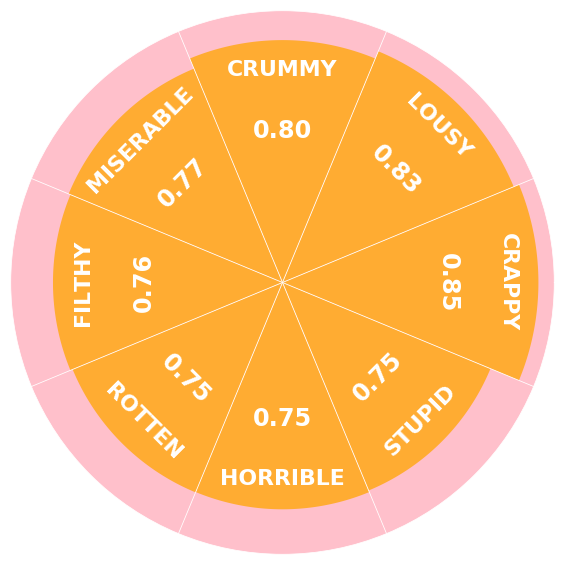

In [307]:
query = {'positive': ['shitty']}
words = model.wv.most_similar_cosmul(topn=8, **query)

ax = plt.subplot(projection='polar')
ax.set_facecolor('pink')

n = len(words)
min_similarity = words[-1][1]
max_similarity = words[0][1]

thetas = np.linspace(0, 2 * np.pi, n, endpoint=False)
width = 2 * np.pi / n
radiuses = [similarity for word, similarity in words]
bars = ax.bar(thetas, radiuses, width=width, color='#FFAC32')

# axis
ax.set_xticks([theta + (width / 2) for theta in thetas])
ax.set_xticklabels([])
ax.set_ylim(0, 0.9)
ax.set_yticklabels([])
ax.tick_params('y', grid_linewidth=0, grid_color='red')
ax.tick_params('x', colors='red', which='both', grid_color='white')
ax.spines['polar'].set_edgecolor('white')

# text
for theta, (word, similarity) in zip(thetas, words):
    rotation = np.rad2deg(theta)
    if theta > np.pi:
        rotation += 90
    else:
        rotation -= 90
    ax.text(
        theta, similarity - 0.1, word.upper(),
        rotation=rotation,
        color='white',
        fontsize='22',
        fontweight='bold',
        rotation_mode='anchor',
        horizontalalignment='center',
        verticalalignment='center'
    )
    ax.text(
        theta, similarity - 0.3, f"{similarity:.2f}",
        rotation=rotation,
        color='white',
        fontsize='24',
        fontweight='bold',
        rotation_mode='anchor',
        horizontalalignment='center',
        verticalalignment='center'
    )
    
plt.savefig("shitty.svg", format="svg")